### NIXTLA TIME GPT FOR BTC-USD PRICE PREDICTION

TimeGPT is a production-ready generative pretrained transformer for time series. It’s capable of accurately predicting various domains such as retail, electricity, finance, and IoT with just a few lines of code.

It is user-friendly and low-code. Users can simply upload their time series data and generate forecasts or detect anomalies with just a single line of code.

In [2]:
# pip install nixtla
from nixtla import NixtlaClient
import pandas as pd
import  numpy as np
from utilsforecast.losses import mae, mse, rmse, mape, smape
from IPython.display import display



Setting up your API key

Once the scripit is done, securize your api_key using this small tutorial :  https://docs.nixtla.io/docs/getting-started-setting_up_your_api_key

In [3]:
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-fnj4n1KPj6CDdcHsbMFNVrP8bs37qaOmfphj9Hx2Erj8XPdQJBPiN3WvfUhsXpb4ybr4gyWU82OINM43'
)

In [4]:
def fill_gaps_with_interpolation(df, col, expected_freq):
    """
    Fills gaps in the DataFrame using linear interpolation, based on the expected frequency.
    Ensures 'time_period_start' is in datetime format and 'id' is the index.

    Parameters:
        df (pd.DataFrame): The DataFrame to be interpolated.
        expected_freq (str): The frequency string indicating the expected interval between rows.

    Returns:
        pd.DataFrame: The interpolated DataFrame with gaps filled.
    """
    df[col] = pd.to_datetime(df[col], utc=True)
    df_temp = df.set_index(col)
    expected_freq = expected_freq.replace('HRS', 'h').replace('MIN', 'min')
    full_index = pd.date_range(start=df_temp.index.min(), end=df_temp.index.max(), freq=expected_freq)
    df_reindexed = df_temp.reindex(full_index)
    df_reindexed['is_interpolated'] = df_reindexed.isna().any(axis=1)
    df_interpolated = df_reindexed.interpolate(method='linear')
    df_interpolated.reset_index(inplace=True)
    df_interpolated.rename(columns={'index': col}, inplace=True)

    return df_interpolated

In [5]:
df = pd.read_csv("C:/Users/SolalDanan/Trading Signal/1years_ohlcv_btc_usd_spot_1HRS.csv", parse_dates=['time_period_end'])
df = fill_gaps_with_interpolation(df, 'time_period_end','1HRS')
df = df[['time_period_end', 'price_close']].rename(columns={'time_period_end': 'date', 'price_close': 'value'})
df['date'] = df['date'].dt.tz_convert(None)
df.insert(loc=0, column='unique_id', value=1)

df

C:\Users\SolalDanan\AppData\Local\Temp\ipykernel_21664\3005932370.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_reindexed.interpolate(method='linear')


,unique_id,date,value
0,1,2023-03-01 01:00:00,23103.31
1,1,2023-03-01 02:00:00,23253.04
2,1,2023-03-01 03:00:00,23333.54
3,1,2023-03-01 04:00:00,23443.06
4,1,2023-03-01 05:00:00,23788.52
...,...,...,...
10867,1,2024-05-26 20:00:00,68864.96
10868,1,2024-05-26 21:00:00,68680.91
10869,1,2024-05-26 22:00:00,68495.63
10870,1,2024-05-26 23:00:00,68526.05


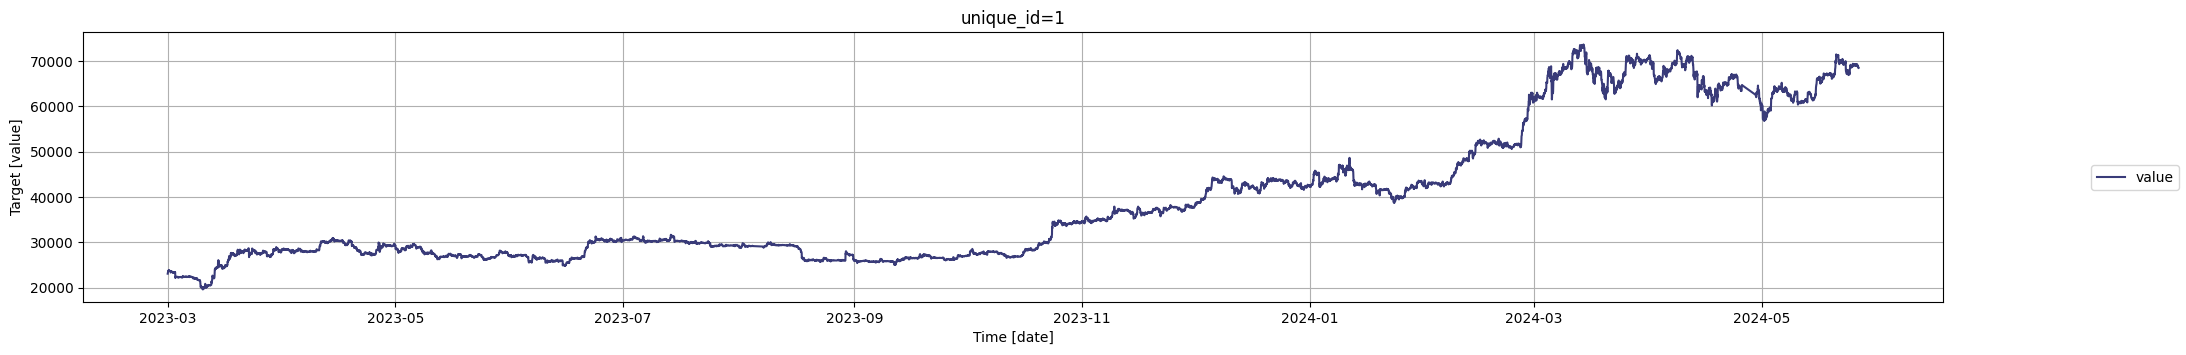

In [6]:
nixtla_client.plot(df, time_col='date', target_col='value')

- df: A pandas DataFrame containing the time series data.
- h: Horizons is the number of steps ahead to forecast.
- freq: The frequency of the time series in Pandas format. See pandas’ available frequencies. (If you don’t provide any frequency, the SDK will try to infer it) exemple: freq="2h20min"
- time_col: The column that identifies the datestamp.
- target_col: The variable to forecast.

In [7]:
timegpt_fcst_df  = nixtla_client.forecast(df=df.tail(100), h=15, freq='h', time_col='date', target_col='value')
timegpt_fcst_df , df.tail(10)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


(    unique_id                 date       TimeGPT
 0           1  2024-05-27 01:00:00  68923.226562
 1           1  2024-05-27 02:00:00  69138.750000
 2           1  2024-05-27 03:00:00  68980.578125
 3           1  2024-05-27 04:00:00  68774.429688
 4           1  2024-05-27 05:00:00  68694.304688
 5           1  2024-05-27 06:00:00  68363.156250
 6           1  2024-05-27 07:00:00  68204.476562
 7           1  2024-05-27 08:00:00  68330.882812
 8           1  2024-05-27 09:00:00  68392.562500
 9           1  2024-05-27 10:00:00  68729.109375
 10          1  2024-05-27 11:00:00  68759.171875
 11          1  2024-05-27 12:00:00  68901.312500
 12          1  2024-05-27 13:00:00  68876.046875
 13          1  2024-05-27 14:00:00  69107.625000
 14          1  2024-05-27 15:00:00  69081.250000,
        unique_id                date     value
 10862          1 2024-05-26 15:00:00  69238.71
 10863          1 2024-05-26 16:00:00  68826.37
 10864          1 2024-05-26 17:00:00  68769.00
 10865 

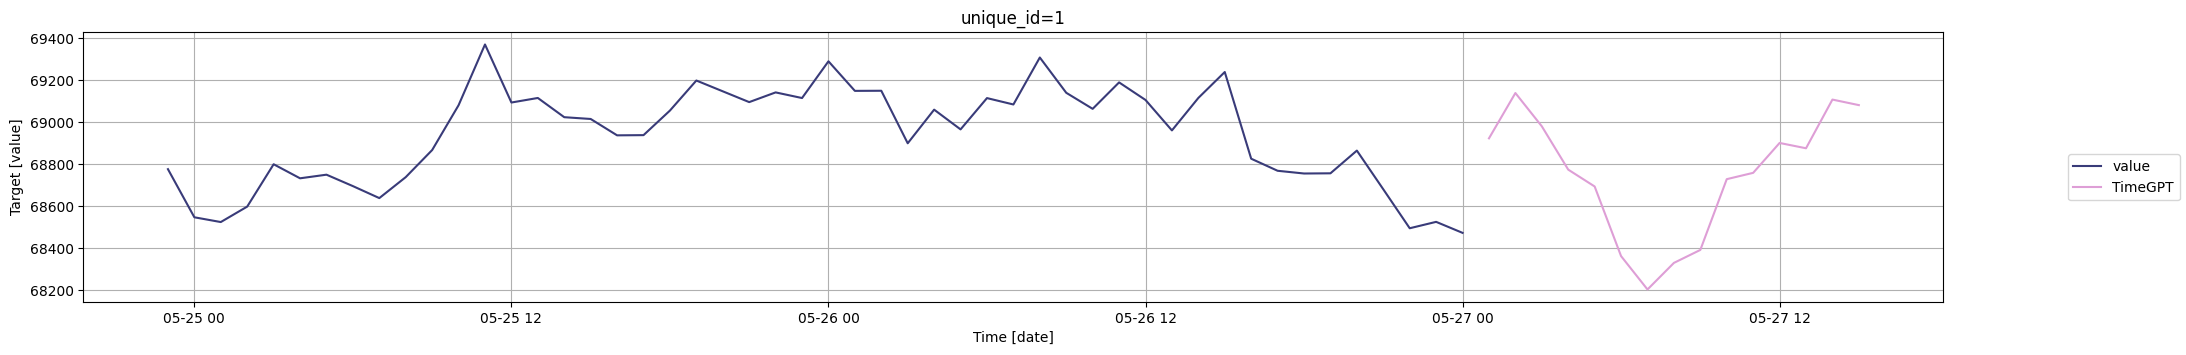

In [8]:
nixtla_client.plot(df=df.tail(50), forecasts_df=timegpt_fcst_df, time_col='date', target_col='value')


## Fine-Tuning

Fine-tuning is a powerful process for utilizing TimeGPT more effectively. Foundation models such as TimeGPT are pre-trained on vast amounts of data, capturing wide-ranging features and patterns. These models can then be specialized for specific contexts or domains. With fine-tuning, the model’s parameters are refined to forecast a new task, allowing it to tailor its vast pre-existing knowledge towards the requirements of the new data. Fine-tuning thus serves as a crucial bridge, linking TimeGPT’s broad capabilities to your tasks specificities.

Concretely, the process of fine-tuning consists of performing a certain number of training iterations on your input data minimizing the forecasting error. The forecasts will then be produced with the updated model. To control the number of iterations, use the finetune_steps argument of the forecast method.


In this code, finetune_steps=10 means the model will go through 10 iterations of training on your time series data.

Keep in mind that fine-tuning can be a bit of trial and error. You might need to adjust the number of finetune_steps based on your specific needs and the complexity of your data. It’s recommended to monitor the model’s performance during fine-tuning and adjust as needed. Be aware that more finetune_steps may lead to longer training times and could potentially lead to overfitting if not managed properly.

Remember, fine-tuning is a powerful feature, but it should be used thoughtfully and carefully. 

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


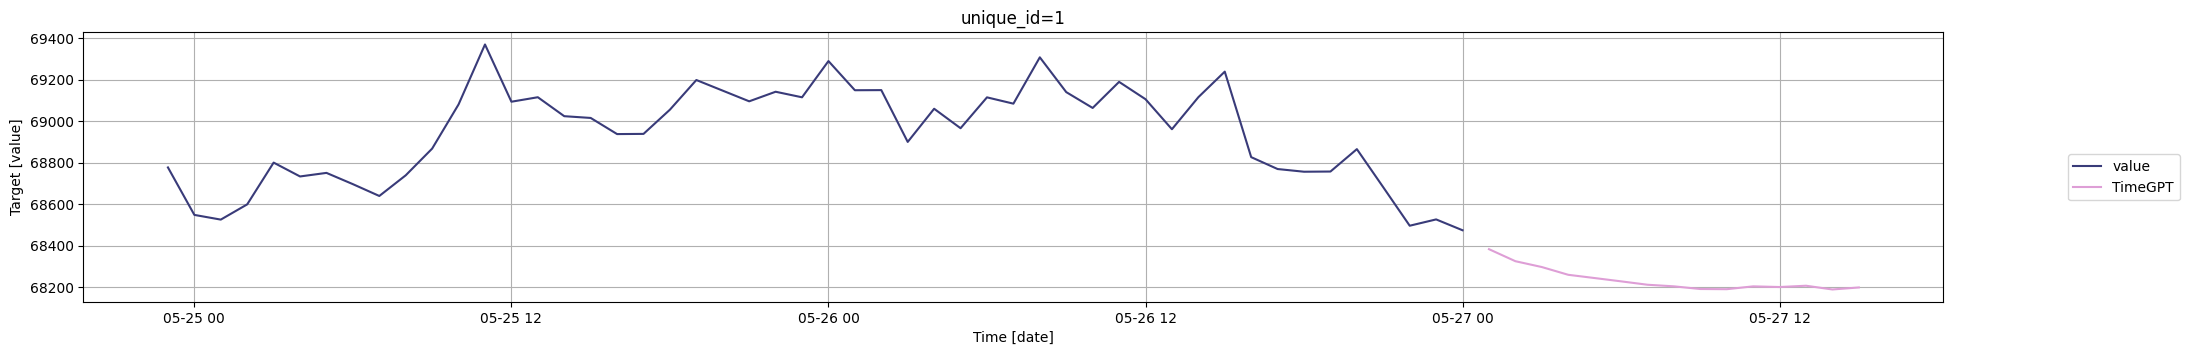

In [9]:
timegpt_fcst_finetune_df = nixtla_client.forecast(df=df.tail(144),  h=15, freq='h', time_col='date', target_col='value', finetune_steps=5)
nixtla_client.plot(df=df.tail(50) , forecasts_df=timegpt_fcst_finetune_df, time_col='date', target_col='value')

We can decide which loss function to use while fine-tuning our models:
- "default" - a proprietary loss function that is robust to outliers
- "mae" - mean absolute error
- "mse" - mean squared error
- "rmse" - root mean squared error
- "mape" - mean absolute percentage error
- "smape" - symmetric mean absolute percentage error

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


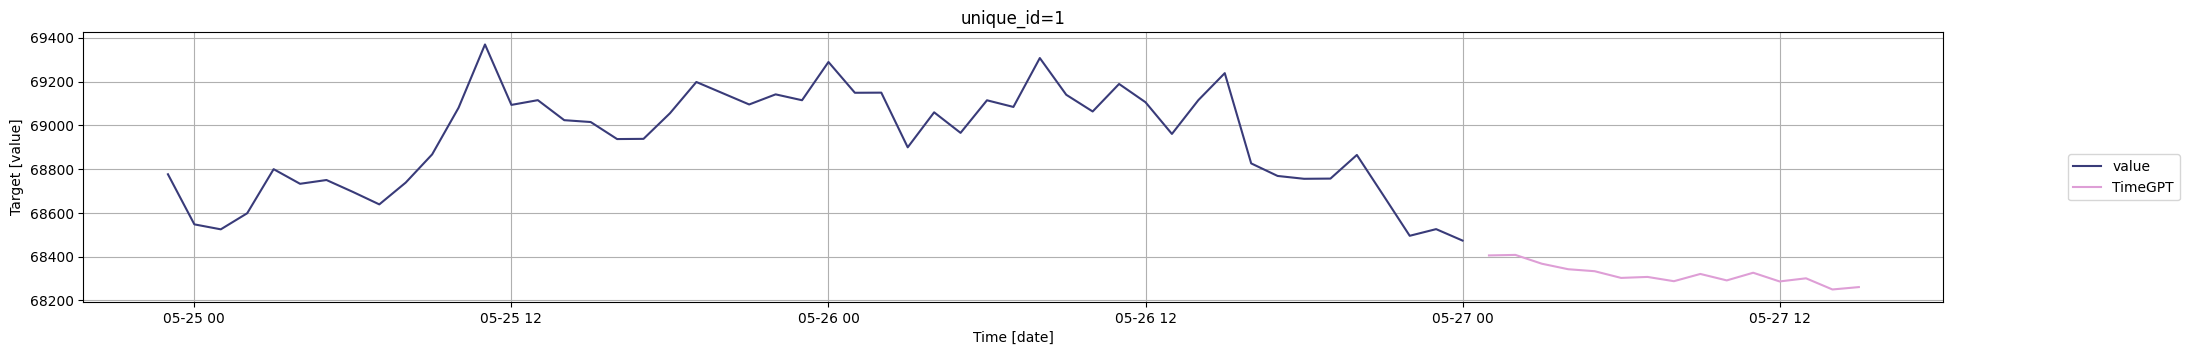

In [10]:
timegpt_fcst_finetune_df = nixtla_client.forecast(df=df.tail(144),  h=15, freq='h', time_col='date', target_col='value', finetune_steps=5, finetune_loss='mape')
nixtla_client.plot(df=df.tail(50) , forecasts_df=timegpt_fcst_finetune_df, time_col='date', target_col='value')

With TimeGPT, you can choose your loss function during fine-tuning as to maximize the model’s performance metric for your particular use case.

Let’s run a small experiment to see how each loss function improves their associated metric when compared to the default setting.

In [11]:
train = df.tail(160)[:-15]
test = df.tail(160)[-15:]
test.index.name = 'unique_id'

losses = ['default', 'mae', 'mse', 'rmse', 'mape', 'smape']

test = test.copy()

for loss in losses:
    preds_df = nixtla_client.forecast(df=train,  h=15, finetune_steps=10, finetune_loss=loss, time_col='date',  target_col='value')
    preds = preds_df['TimeGPT'].values
    test.loc[:,f'TimeGPT_{loss}'] = preds

test

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:

,unique_id,date,value,TimeGPT_default,TimeGPT_mae,TimeGPT_mse,TimeGPT_rmse,TimeGPT_mape,TimeGPT_smape
unique_id,,,,,,,,,
10857,1,2024-05-26 10:00:00,69063.56,69108.609375,69115.507812,69108.750000,69115.882812,69078.312500,69172.140625
10858,1,2024-05-26 11:00:00,69189.31,69110.578125,69094.789062,69110.757812,69118.710938,69067.617188,69083.234375
10859,1,2024-05-26 12:00:00,69105.77,69113.312500,69063.195312,69113.453125,69121.867188,69060.765625,69020.609375
10860,1,2024-05-26 13:00:00,68960.97,69055.906250,69033.203125,69055.937500,69064.210938,69051.976562,68988.859375
10861,1,2024-05-26 14:00:00,69115.39,69013.226562,68974.632812,69013.125000,69020.085938,69004.789062,68939.179688
10862,1,2024-05-26 15:00:00,69238.71,68999.906250,68974.085938,68999.851562,69005.226562,68961.601562,68998.460938
10863,1,2024-05-26 16:00:00,68826.37,68956.656250,68927.265625,68956.554688,68962.109375,68920.171875,68947.718750
10864,1,2024-05-26 17:00:00,68769.00,68942.789062,68919.046875,68942.625000,68947.750000,68954.757812,68942.867188
10865,1,2024-05-26 18:00:00,68756.02,68991.937500,68980.085938,68991.867188,68995.507812,69047.789062,68954.492188


In [12]:
loss_fct_dict = {
    "mae": mae,
    "mse": mse,
    "rmse": rmse,
    "mape": mape,
    "smape": smape
}

pct_improv = []

for loss in losses[1:]:
    loss_function = loss_fct_dict[loss]
    evaluation = loss_function(test, models=['TimeGPT_default', f'TimeGPT_{loss}'], id_col='unique_id', target_col='value')
    pct_diff = (evaluation['TimeGPT_default'] - evaluation[f'TimeGPT_{loss}']) / evaluation['TimeGPT_default'] * 100
    pct_improv.append(round(pct_diff, 2))


data = {
    'mae': pct_improv[0].values,
    'mse': pct_improv[1].values,
    'rmse': pct_improv[2].values,
    'mape': pct_improv[3].values,
    'smape': pct_improv[4].values
}

metrics_df = pd.DataFrame(data)
metrics_df.index = ['Metric improvement (%)']

metrics_df

,mae,mse,rmse,mape,smape
Metric improvement (%),1.82,0.04,-0.19,-3.32,-4.66


From the table above, we can see that using a specific loss function during fine-tuning will improve its associated error metric when compared to the default loss function.

In this example, using the MAE as the loss function improves the metric by 1.82% when compared to using the default loss function.

That way, depending on your use case and performance metric, you can use the appropriate loss function to maximize the accuracy of the forecasts.

## Validation

One of the primary challenges in time series forecasting is the inherent uncertainty and variability over time, making it crucial to validate the accuracy and reliability of the models employed. TimeGPT offers the possibility for cross-validation and historical forecasts to help you validate your predictions.

**Cross Validation**

Cross-validation, a robust model validation technique, is particularly adapted for this task, as it provides insights into the expected performance of a model on unseen data, ensuring the forecasts are reliable and resilient before being deployed in real-world scenarios.

TimeGPT, understanding the intricate needs of time series forecasting, incorporates the cross_validation method, designed to streamline the validation process for time series models. This functionality enables practitioners to rigorously test their forecasting models against historical data, assessing their effectiveness while tuning them for optimal performance.

The cross_validation method within the TimeGPT class is an advanced functionality crafted to perform systematic validation on time series forecasting models. This method necessitates a dataframe comprising time-ordered data and employs a rolling-window scheme to meticulously evaluate the model’s performance across different time periods, thereby ensuring the model’s reliability and stability over time. The animation below shows how TimeGPT performs cross-validation.

The method offers customization through parameters like n_windows, indicating the number of separate time windows on which the model is assessed, and step_size, determining the gap between these windows. If step_size is unspecified, it defaults to the forecast horizon h.

The process also allows for model refinement via finetune_steps, specifying the number of iterations for model fine-tuning on new data. Additionally, the method supports enhanced feature engineering from time data through the date_features parameter, which can automatically generate crucial date-related features or accept custom functions for bespoke feature creation. The date_features_to_one_hot parameter further enables the transformation of categorical date features into a format suitable for machine learning models.

In execution, cross_validation assesses the model’s forecasting accuracy in each window, providing a robust view of the model’s performance variability over time and potential overfitting. This detailed evaluation ensures the forecasts generated are not only accurate but also consistent across diverse temporal contexts.

In [13]:
timegpt_cv_df = nixtla_client.cross_validation(
    df.tail(110), 
    h=7, 
    n_windows=5, 
    time_col='date', 
    target_col='value', 
    freq='h',
)

# Inspect the DataFrame
print(timegpt_cv_df.head())


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Cross Validation Endpoint...


   unique_id                 date              cutoff     value       TimeGPT
0          1  2024-05-25 14:00:00 2024-05-25 13:00:00  69023.83  69239.085938
1          1  2024-05-25 15:00:00 2024-05-25 13:00:00  69015.38  69756.687500
2          1  2024-05-25 16:00:00 2024-05-25 13:00:00  68937.55  70068.281250
3          1  2024-05-25 17:00:00 2024-05-25 13:00:00  68938.48  69621.890625
4          1  2024-05-25 18:00:00 2024-05-25 13:00:00  69055.35  70672.171875


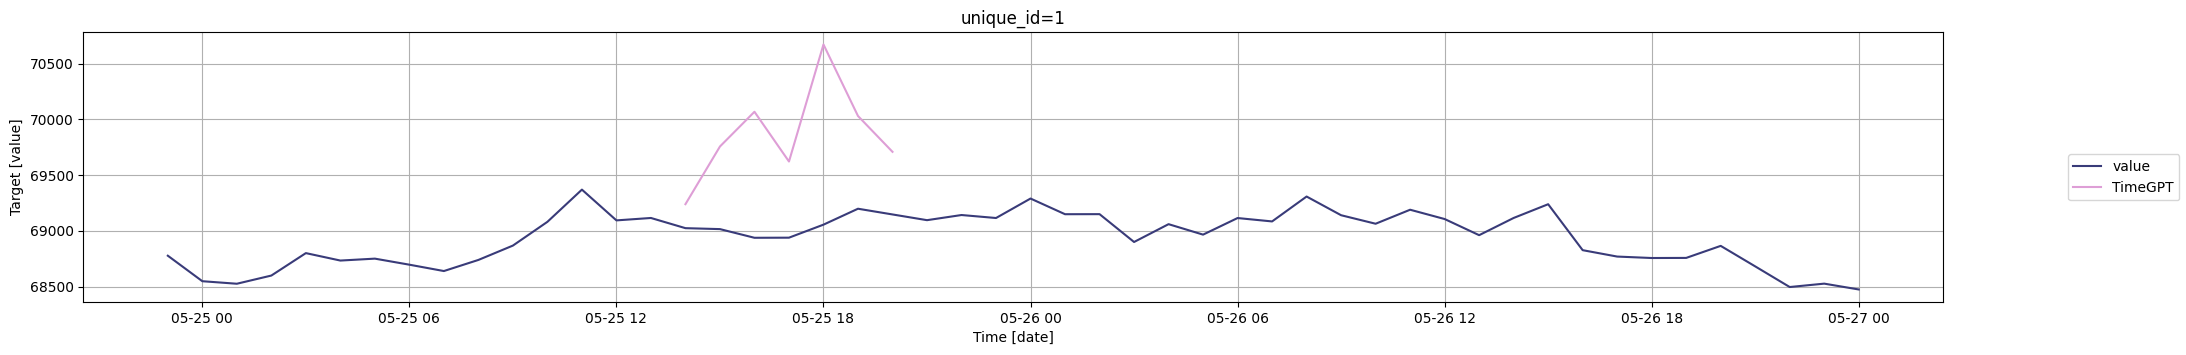

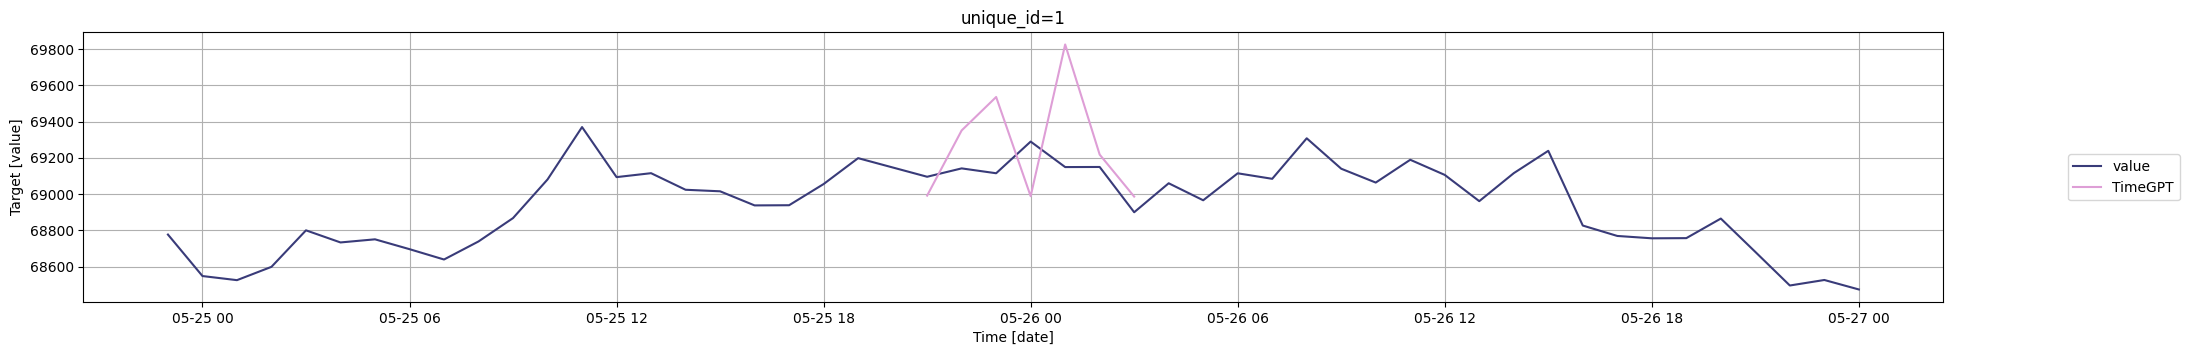

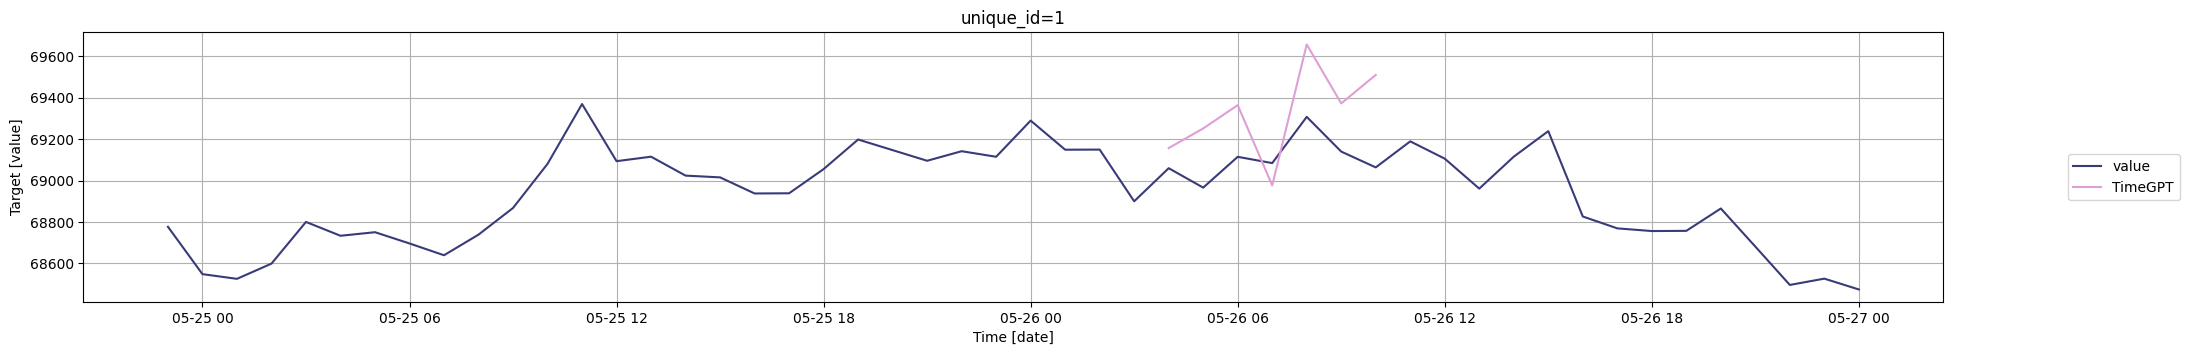

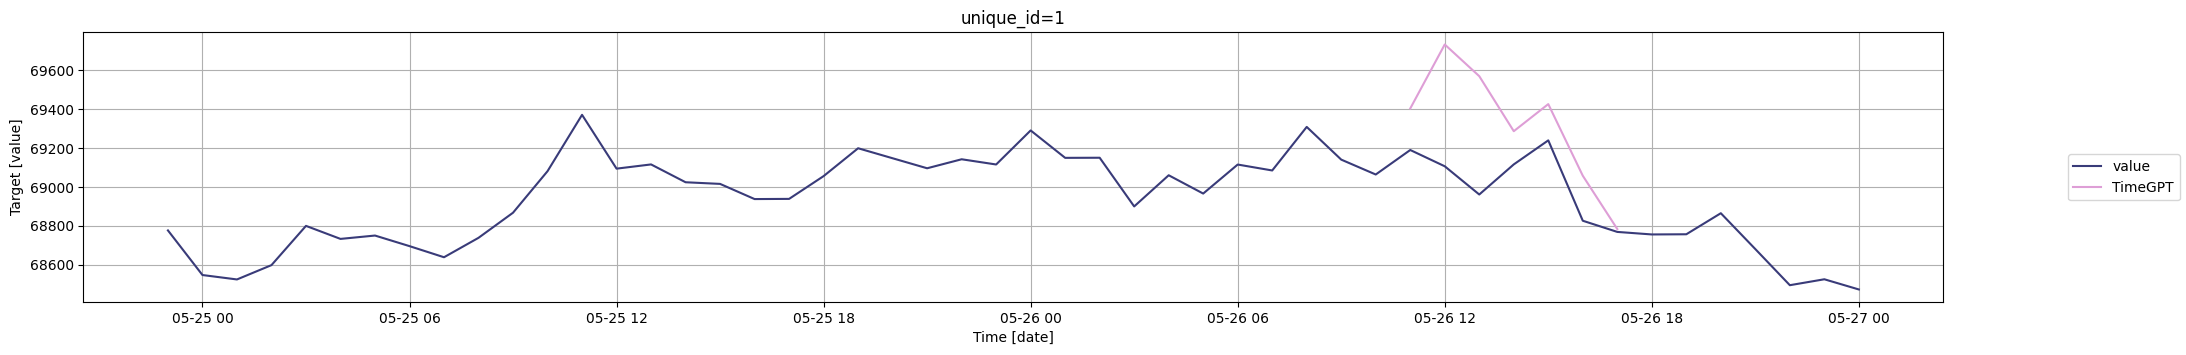

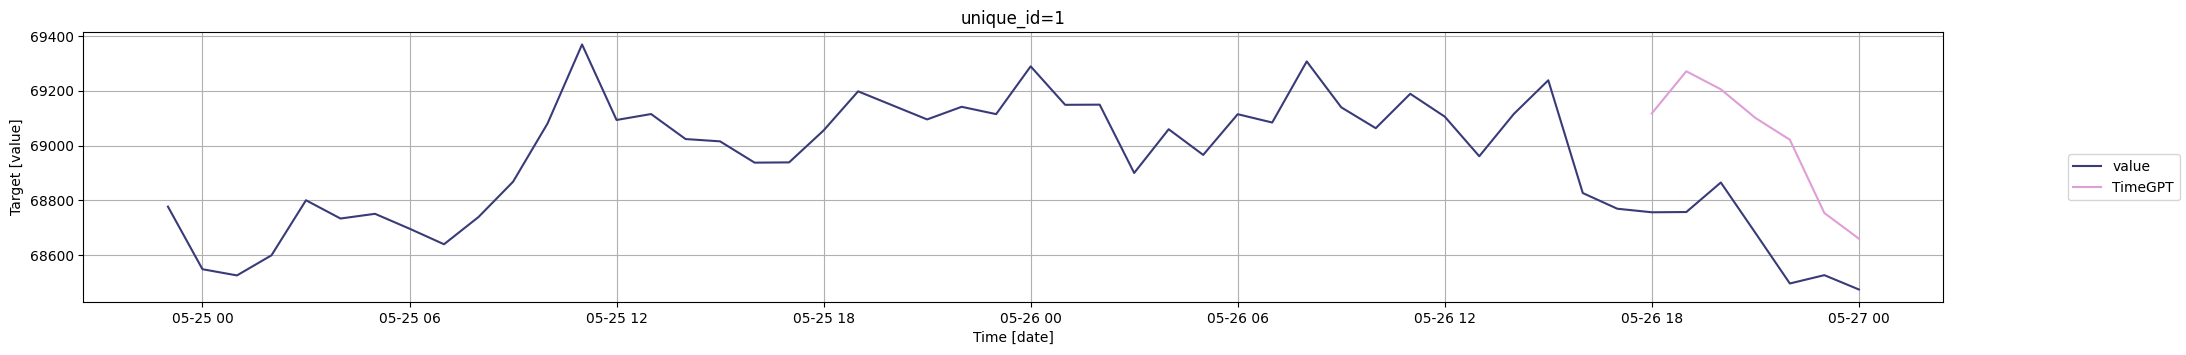

In [14]:
cutoffs = timegpt_cv_df['cutoff'].unique()
for cutoff in cutoffs:
    fig = nixtla_client.plot(
        df.tail(50), 
        timegpt_cv_df.query('cutoff == @cutoff').drop(columns=['cutoff', 'value']),
        time_col='date', 
        target_col='value'
    )
    display(fig)

**Historical forecast**

Our time series model offers a powerful feature that allows users to retrieve historical forecasts alongside the prospective predictions. This functionality is accessible through the forecast method by setting the add_history=True argument.

When add_history is set to True, the output DataFrame will include not only the future forecasts determined by the h argument, but also the historical predictions. Currently, the historical forecasts are not affected by h, and have a fix horizon depending on the frequency of the data. The historical forecasts are produced in a rolling window fashion, and concatenated. This means that the model is applied sequentially at each time step using only the most recent information available up to that point.

In [15]:
timegpt_fcst_with_history_df = nixtla_client.forecast(df=df.tail(200), h=15, time_col='date', target_col='value', add_history=True)
timegpt_fcst_with_history_df.tail(20)


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


,unique_id,date,TimeGPT
67,1,2024-05-26 20:00:00,69595.210938
68,1,2024-05-26 21:00:00,69597.031250
69,1,2024-05-26 22:00:00,69604.015625
70,1,2024-05-26 23:00:00,69631.906250
71,1,2024-05-27 00:00:00,69636.906250
0,1,2024-05-27 01:00:00,68494.445312
1,1,2024-05-27 02:00:00,68471.140625
2,1,2024-05-27 03:00:00,68462.085938
3,1,2024-05-27 04:00:00,68447.882812
4,1,2024-05-27 05:00:00,68429.265625


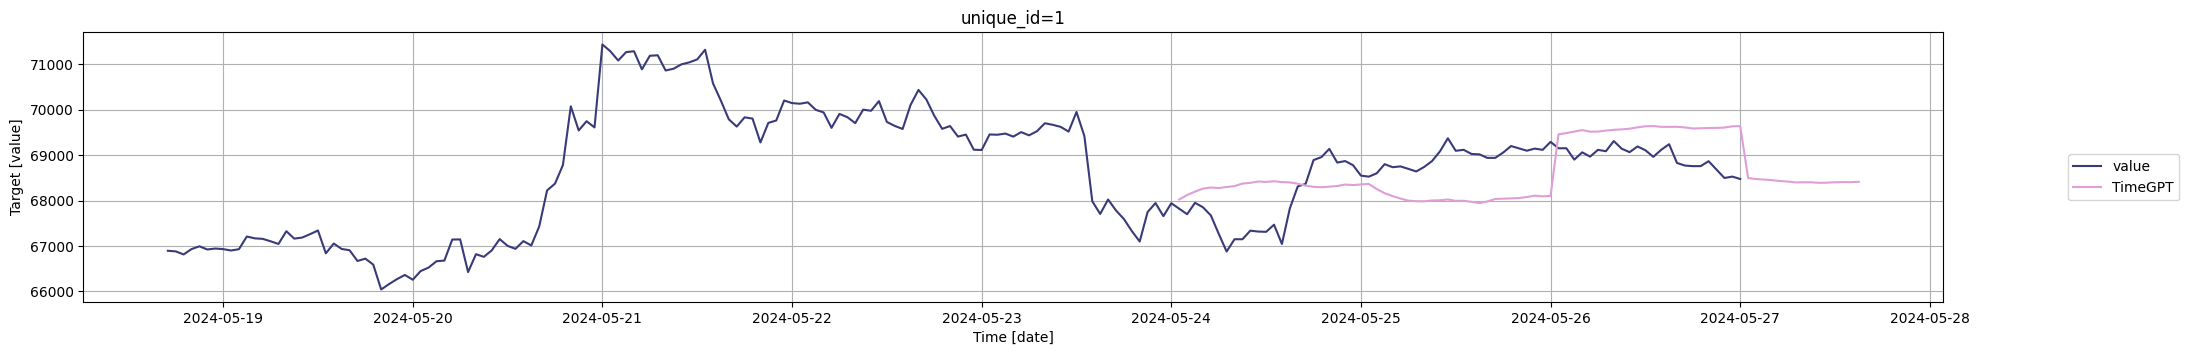

In [16]:
nixtla_client.plot(df.tail(200), timegpt_fcst_with_history_df, time_col='date', target_col='value')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


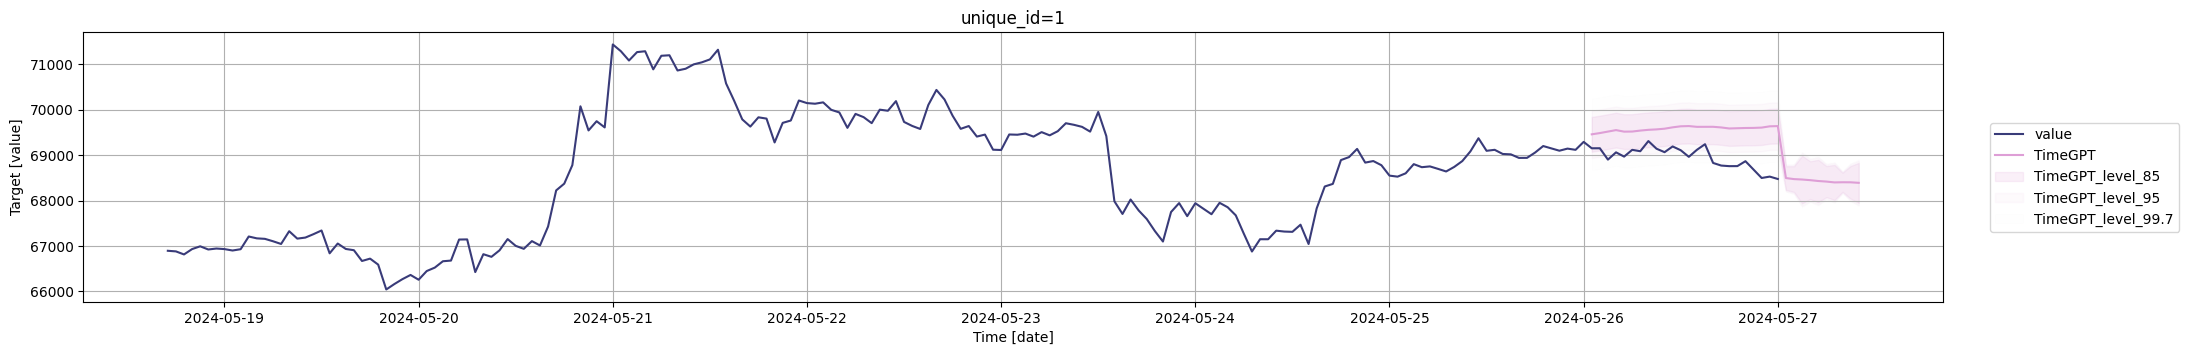

In [17]:
timegpt_fcst_pred_int_df = nixtla_client.forecast(
    df=df.tail(144), h=10, level=[85, 95, 99.7], 
    time_col='date', target_col='value', add_history=True,
)
timegpt_fcst_pred_int_df.head()

nixtla_client.plot(
    df.tail(200), timegpt_fcst_pred_int_df, 
    time_col='date', target_col='value',
    level=[85, 95, 99.7],
)

## Bitcoin price prediction


       unique_id                date     value
0              1 2023-03-01 00:15:00  23163.47
1              1 2023-03-01 00:30:00  23175.01
2              1 2023-03-01 00:45:00  23147.65
3              1 2023-03-01 01:00:00  23103.31
4              1 2023-03-01 01:15:00  23168.42
...          ...                 ...       ...
43483          1 2024-05-26 23:00:00  68526.05
43484          1 2024-05-26 23:15:00  68468.49
43485          1 2024-05-26 23:30:00  68380.00
43486          1 2024-05-26 23:45:00  68447.71
43487          1 2024-05-27 00:00:00  68473.72

[43488 rows x 3 columns]


C:\Users\SolalDanan\AppData\Local\Temp\ipykernel_21664\3005932370.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_reindexed.interpolate(method='linear')


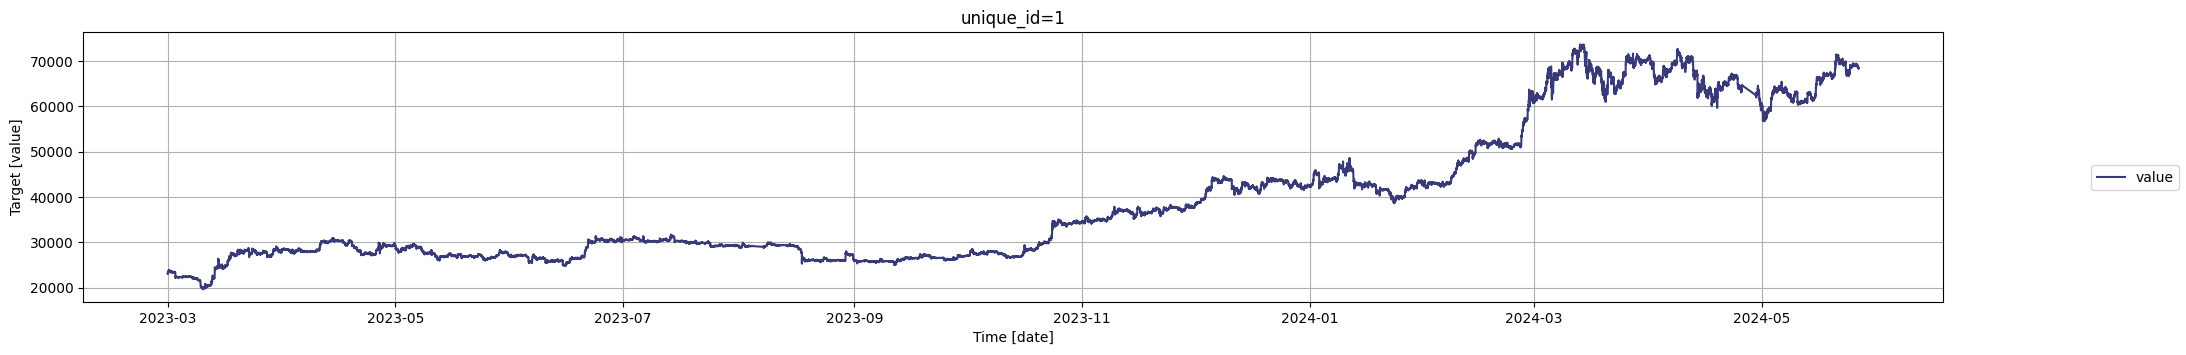

In [18]:
df = pd.read_csv("C:/Users/SolalDanan/Trading Signal/1years_ohlcv_btc_usd_spot_15MIN.csv", parse_dates=['time_period_end'])
df = fill_gaps_with_interpolation(df, 'time_period_end','15MIN')
df = df[['time_period_end', 'price_close']].rename(columns={'time_period_end': 'date', 'price_close': 'value'})
df['date'] = df['date'].dt.tz_convert(None)
df.insert(loc=0, column='unique_id', value=1)

print(df)
nixtla_client.plot(df, time_col="date", target_col="value")


### Forecast with TimeGPT

Now we are ready to generate predictions with TimeGPT. To do this, we will use the forecast method from the NixtlaClient class.

The forecast method requires the following arguments:

- df: The DataFrame containing the time series data

- h: (int) The forecast horizon. In this case, we will forecast the next 7 hours.

- level: (list) The confidence level for the prediction intervals. Given the inherent volatility of Bitcoin, we will use multiple confidence levels.

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


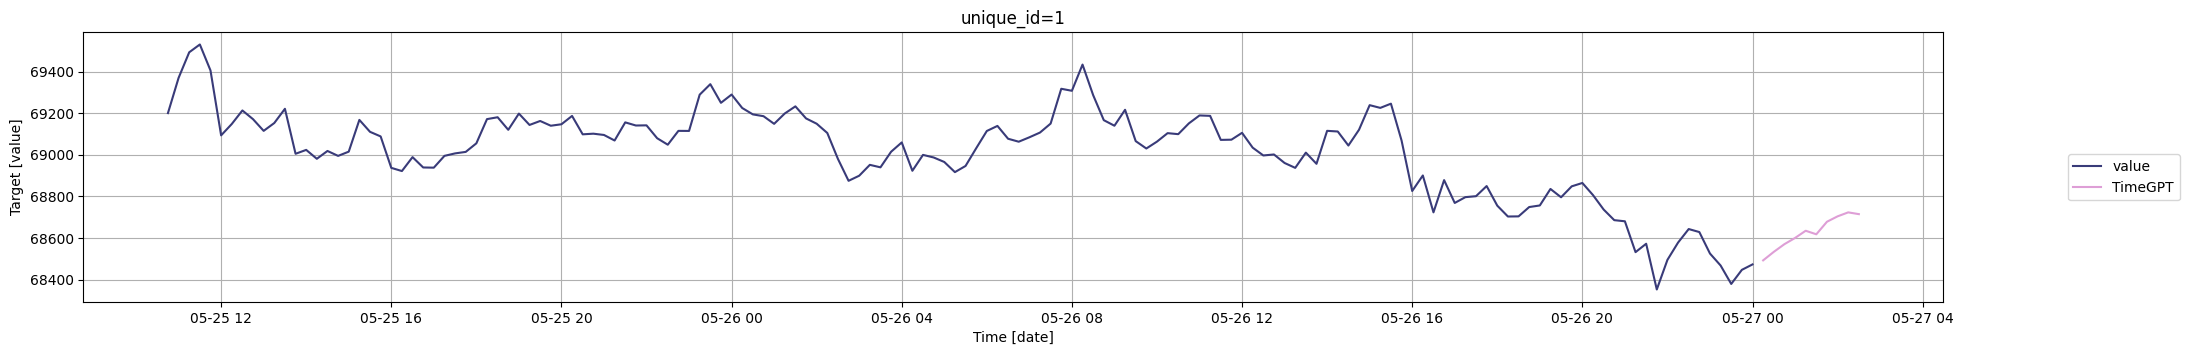

In [19]:
fcst = nixtla_client.forecast(df.tail(118), h=10, freq="15min", time_col="date", target_col="value")
fcst.head()
nixtla_client.plot(df, fcst, max_insample_length=150, time_col="date", target_col="value")

C:\Users\SolalDanan\AppData\Local\Temp\ipykernel_21664\3005932370.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_reindexed.interpolate(method='linear')
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...


       unique_id                date     value
10000          1 2024-04-20 17:00:00  64767.45
10001          1 2024-04-20 18:00:00  65233.42
10002          1 2024-04-20 19:00:00  64992.86
10003          1 2024-04-20 20:00:00  64884.74
10004          1 2024-04-20 21:00:00  64756.18
...          ...                 ...       ...
10867          1 2024-05-26 20:00:00  68864.96
10868          1 2024-05-26 21:00:00  68680.91
10869          1 2024-05-26 22:00:00  68495.63
10870          1 2024-05-26 23:00:00  68526.05
10871          1 2024-05-27 00:00:00  68473.72

[872 rows x 3 columns]


INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing

Test RMSE: 372.206
Test MAPE: 0.374
Test R2: 0.913
Directional Accuracy: 0.417


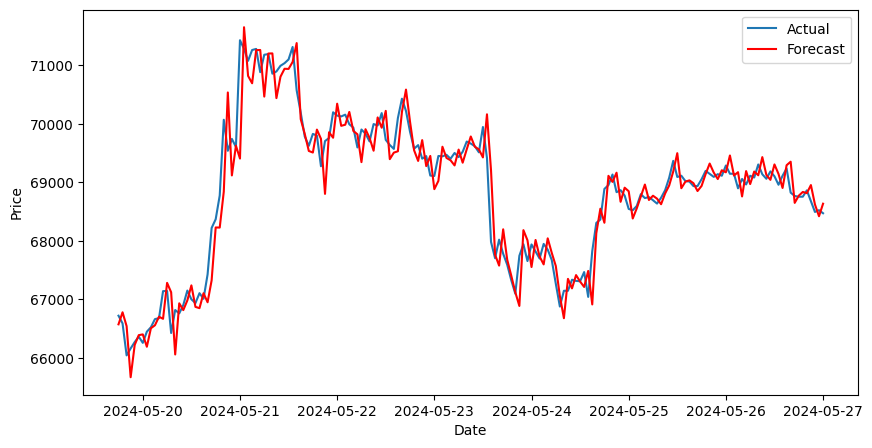

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

# Reading and preprocessing data
df = pd.read_csv("C:/Users/SolalDanan/Trading Signal/1years_ohlcv_btc_usd_spot_1HRS.csv", parse_dates=['time_period_end'])
df = fill_gaps_with_interpolation(df, 'time_period_end', '1HRS')
df = df[['time_period_end', 'price_close']].rename(columns={'time_period_end': 'date', 'price_close': 'value'})
df['date'] = df['date'].dt.tz_convert(None)
df.insert(loc=0, column='unique_id', value=1)
df = df[10000:]

# Display the prepared DataFrame
print(df)

# Walk-forward validation setup
size = int(len(df) * 0.8)
train_df = df.iloc[:size]
test_df = df.iloc[size:]

history = train_df.copy()
predictions = []
pred_directions = []
actu_directions = []

# TimeGPT model instantiation and forecasting in a loop
for i in range(len(test_df)):
    # Fit model on the history and forecast
    fcst = nixtla_client.forecast(history.tail(118), h=1, freq="1h", time_col="date", target_col="value")
    yhat = fcst['TimeGPT'].values[0]
    predictions.append(yhat)
    # Append next observation to history
    history = pd.concat([history, test_df.iloc[[i]]], ignore_index=True)
	
	# Cas Specific pr le 1er prediction
    if len(predictions) < 2:
        pred_direction = 0

    else:
        pred_direction = 1 if len(predictions) > 1 and predictions[-2] < predictions[-1] else -1
    actu_direction = 1 if len(history) > 1 and history.iloc[-2]['value'] < history.iloc[-1]['value'] else -1
    
    pred_directions.append(pred_direction)
    actu_directions.append(actu_direction)
    


# Evaluate forecasts
test_values = test_df['value'].values
rmse = np.sqrt(mean_squared_error(test_values, predictions))
mape = np.mean(np.abs((test_values - predictions) / test_values)) * 100
r2 = r2_score(test_values, predictions)
num_matches = sum(pred == actual for pred, actual in zip(pred_directions, actu_directions))
directional_accuracy = num_matches / len(test_values)

# Print metrics
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
print('Test R2: %.3f' % r2)
print('Directional Accuracy: %.3f' % directional_accuracy)

# Plot forecasts against actual outcomes
plt.figure(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(test_df['date'], test_values, label='Actual')
plt.plot(test_df['date'], predictions, color='red', label='Forecast')
plt.legend()
plt.show()
